In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('./data/cleaned_car_prices.csv')

In [6]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,original_price_missing,car_availability_missing,transmission_missing,car_rating_codes
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False,0,0,0,3
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False,0,0,0,3
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,488119.5,great,2021-03-20T05:36:31.311,True,11096,71655,False,False,1,0,0,3
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False,0,0,0,3
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False,0,0,0,3


<Axes: >

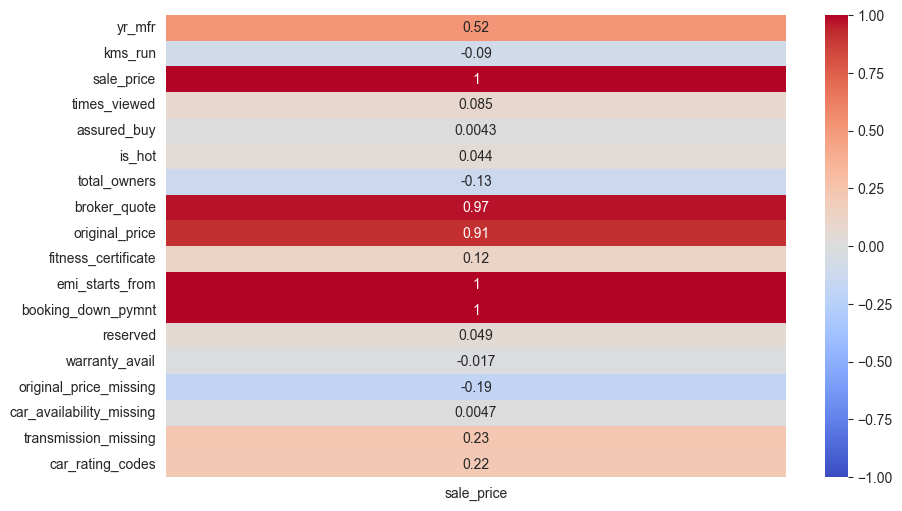

In [7]:
sns.heatmap(df.corr(numeric_only=True)[['sale_price']],
           vmin=-1,
           vmax=1,
           annot=True, 
           cmap='coolwarm')

In [8]:
# TODO: Go back to EDA and make categorical columns codes for ordinal columns
columns = ['yr_mfr', 'total_owners', 'kms_run', 'transmission_missing', 'car_availability_missing', 'car_rating_codes']
nominal_columns = ['transmission', 'make', 'model', 'body_type', 'source', 'fuel_type', 'car_availability', 'city', 'variant'] 
# need car rating back, but it is ordinal, so need adjustment

In [9]:
X = df[columns+nominal_columns]
y = df['sale_price']

In [10]:
# X = pd.get_dummies(X, columns=nominal_columns)

In [11]:
scores = []
for i in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_columns)
        ],
        remainder='passthrough'
    )
    model = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("regressor", LinearRegression())
        ]
    )
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    y_preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_preds)
    baseline_preds = np.full_like(y_test, y_test.mean())
    b_rmse = root_mean_squared_error(baseline_preds, y_test)
    scores.append({'size': i, 'r2': r2, 'rmse': rmse, 'baseline rmse': b_rmse})

In [12]:
score_df = pd.DataFrame(scores)

In [13]:
score_df.sort_values(by=['r2', 'rmse'], ascending=False)

,size,r2,rmse,baseline rmse
0,0.20,0.843294,107758.197565,272212.236967
1,0.21,0.833201,110771.245524,271225.197867
3,0.23,0.831403,114223.663636,278182.981132
4,0.24,0.829146,115606.405720,279685.232356
2,0.22,0.828359,114631.531452,276690.176385
5,0.25,0.824717,116941.959745,279319.247062
6,0.26,0.823833,117930.342007,280971.913109
7,0.27,0.823195,118291.317130,281323.472952
8,0.28,0.819268,122588.826613,288359.115291
11,0.31,0.817952,120561.993215,282564.552181


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_columns)
    ],
    remainder='passthrough'
)

In [16]:
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("regressor", LinearRegression())
    ]
)

In [17]:
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
model.score(X_test, y_test)

0.8432941000105865

## Pickling

In [19]:
import pickle

In [20]:
with open('reg.pkl', 'wb') as file:
    pickle.dump(model, file)